In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)
X = np.absolute(X)
X = np.round(X, 2) * 100
X = X.astype(int)
print(X)
print(y)

[[141 115]
 [ 97 200]
 [ 91 202]
 [133  67]
 [ 86  20]
 [202  19]
 [200  69]
 [ 88 100]
 [196  24]
 [191  24]
 [100  98]
 [305  56]
 [120  83]
 [ 16 178]
 [ 32 209]
 [199  17]
 [175  70]
 [ 63  48]
 [115  24]
 [ 81  77]
 [ 64 135]
 [ 46 130]
 [113  86]
 [202  78]
 [ 48  89]
 [ 41 112]
 [206 132]
 [ 81 120]
 [109 100]
 [336  83]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [3]:
y_new = y.reshape(len(y), 1)
data = np.concatenate((X, y_new),axis=1)
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']
df = pd.DataFrame(data, columns=nama_kolom)
df.head()

,Fitur 1,Fitur 2,Label
0,141,115,0
1,97,200,0
2,91,202,0
3,133,67,0
4,86,20,0


In [4]:
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

df_label = df.copy()
df_label['Label'] = df_label['Label'].map(labels)
df_label.head()

,Fitur 1,Fitur 2,Label
0,141,115,Kelas B
1,97,200,Kelas B
2,91,202,Kelas B
3,133,67,Kelas B
4,86,20,Kelas B


C:\Users\Doni Wahyu\AppData\Local\Temp\ipykernel_6156\1191820837.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
C:\Users\Doni Wahyu\AppData\Local\Temp\ipykernel_6156\1191820837.py:8: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


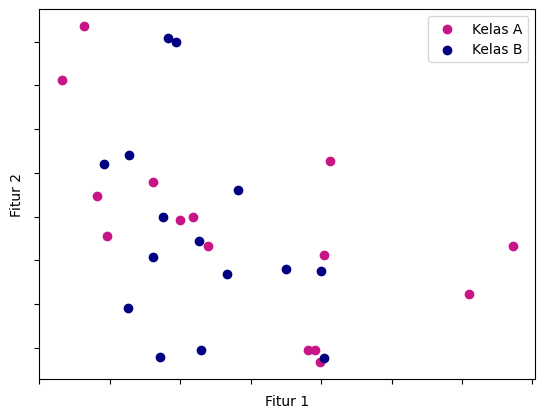

In [5]:
colors = {
    'class_a' : 'MediumVioletRed',
    'class_b' : 'Navy'
}

gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


In [6]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.4444444444444444


In [7]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.8095238095238095
Hasil akurasi data test (Gaussian): 0.4444444444444444
